# Initial look at the images

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageFilter
import random
import cv2
import os, glob

#t = pd.read_csv('../input/train_info.csv'); t.head()
#s = pd.read_csv('../input/submission_info.csv'); s.head()
train_files = [f for f in glob.glob("./train_1/*")]
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in train_files[:100]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(10, 10, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

# Dataset overview

In [5]:
t = pd.read_csv('data/all_data_info.csv'); t.head()

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


# # of paintings per style


Impressionism                   10643
Realism                         10523
Romanticism                      9285
Expressionism                    7013
Post-Impressionism               5778
Art Nouveau (Modern)             4899
Baroque                          4400
Surrealism                       4167
Symbolism                        3476
Rococo                           2733
Northern Renaissance             2379
Naïve Art (Primitivism)          2295
Abstract Expressionism           2074
Neoclassicism                    2038
Cubism                           1747
Ukiyo-e                          1426
Early Renaissance                1351
Mannerism (Late Renaissance)     1342
High Renaissance                 1314
Art Informel                     1267
Magic Realism                    1002
Abstract Art                      979
Academicism                       972
Color Field Painting              910
Pop Art                           791
Fauvism                           731
Lyrical Abst

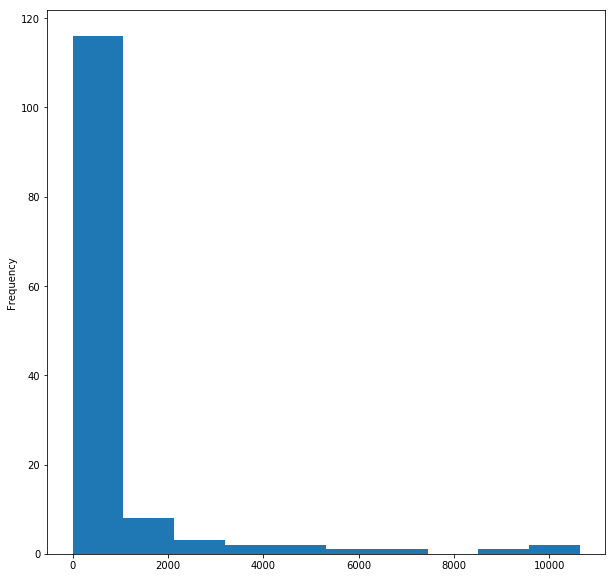

In [38]:
x = t['style'].value_counts()

# idxs = x < 200 # get indices of items that are < 200 to remove them

x = x.drop(x.index[idxs])

x.plot(kind='hist')
print(x)


x.plot(kind='hist')
print(x)
# # of paintings per style

# # of artists per style (e.g. how many impressionist artists)

In [48]:
# of paintings by artist 
x = t['artist'].value_counts()

# idxs = x < 200 # get indices of items that are < 200 to remove them

x = x.drop(x.index[idxs])

x.plot(kind='hist')
print(x)
# # of paintings per style

# # of artists per style (e.g. how many impressionist artists)

ValueError: labels [ True  True  True ..., False False False] not contained in axis

# Data processing TODOs
STYLE CLASSIFICATION:
1. filter down to just the styles with 1k+ images
2. Randomly sample 2k images from each (with a fixed seed! so it's same across runs)
3. Determine train/test/validation splits (80/10/10) - split each style so they are equally represented across all sets
4. Save 3 separate CVS with the lists of images in each split (to reuse)


ARTIST CLASSIFICATION:
1. filter down to just the artists with 450+(?) images
2. Randomly sample 2k images from each (with a fixed seed! so it's same across runs)
3. Determine train/test/validation splits (80/10/10) - split each artist so they are equally represented across all sets
4. Save 3 separate CVS with the lists of images in each split (to reuse)

In [44]:
t[t.artist=='Barnett Newman']

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
6,Barnett Newman,NaN,abstract,7345.0,8640.0,6383948.0,wikiart,Color Field Painting,"Who’s Afraid of Red, Yellow and Blue II",train_only,True,62252.jpg
8,Barnett Newman,1963.0,abstract,6049.0,8206.0,1135960.0,wikiart,Color Field Painting,Black Fire I,train_only,True,63861.jpg
22,Barnett Newman,1952.0,abstract,3609.0,9541.0,2837664.0,wikiart,Color Field Painting,Ulysses,train_only,True,59145.jpg
62,Barnett Newman,1958.0,abstract,4357.0,5607.0,1351529.0,wikiart,Color Field Painting,1. First Station,train_only,True,73319.jpg
143,Barnett Newman,1949.0,abstract,3773.0,4859.0,992510.0,wikiart,Color Field Painting,Yellow Painting,train_only,True,49147.jpg
186,Barnett Newman,1949.0,abstract,3529.0,4825.0,2187138.0,wikiart,Color Field Painting,Dionysius,train_only,True,62037.jpg
1534,Barnett Newman,NaN,abstract,2448.0,3264.0,1086713.0,wikiart,Color Field Painting,Eve,train_only,True,100820.jpg
4116,Barnett Newman,1964.0,abstract,2480.0,2107.0,2983479.0,wikiart,Color Field Painting,The Third,train_only,True,46144.jpg
